In [118]:
#load the libraries and titanic data
#you can find it here :  https://www.kaggle.com/c/titanic/data 

import pandas as pd

titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [119]:
#print the dataset shape

print(titanic.shape)

(891, 12)


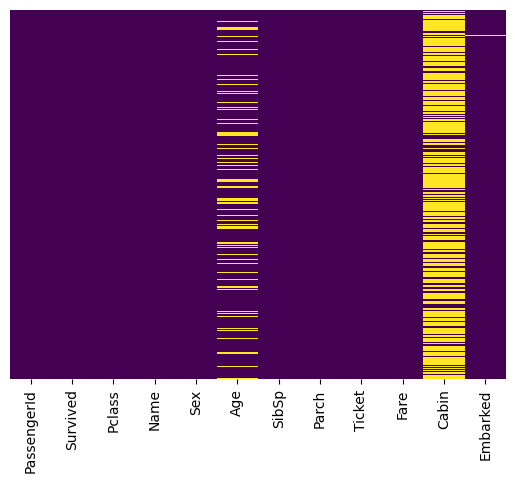

In [120]:
#plot the NaN values with a heatmap
#matplotlib.axes._subplots.AxesSubplot
import matplotlib.pyplot as plt

import seaborn as sns

sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [121]:
#print the age % of NaN values
print(titanic['Age'].isnull().sum()/len(titanic)*100)

19.865319865319865


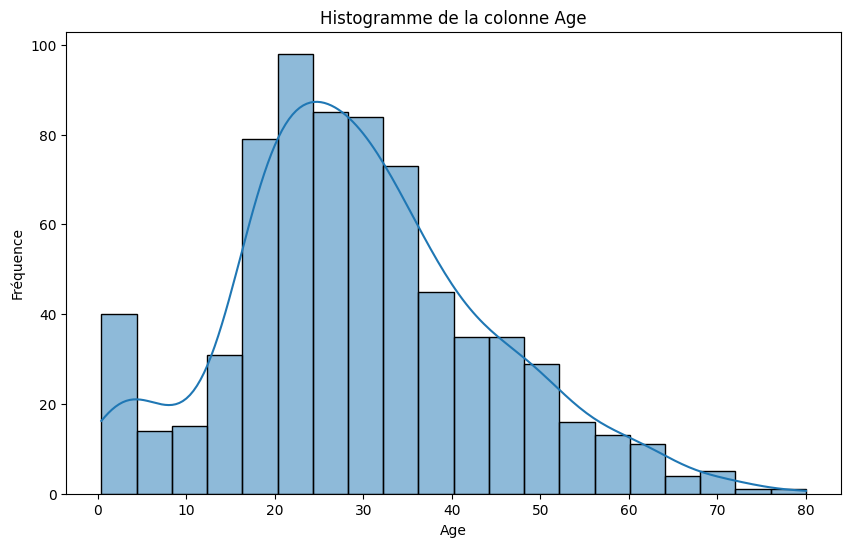

In [122]:
#print the histogram of the age column
plt.figure(figsize=(10, 6))
sns.histplot(data= titanic, x='Age', kde=True)
plt.title('Histogramme de la colonne Age')
plt.xlabel('Age')
plt.ylabel('Fréquence')
# Sauvegarde du graphique (optionnel)
plt.savefig('age_histogram.png')
plt.show()

In [123]:
#print the median and the mean of the age column

print(titanic['Age'].median())
print(titanic['Age'].mean())

28.0
29.69911764705882


In [124]:
#print the cabin % of NaN values
print(titanic['Cabin'].isnull().sum()/len(titanic)*100)


77.10437710437711


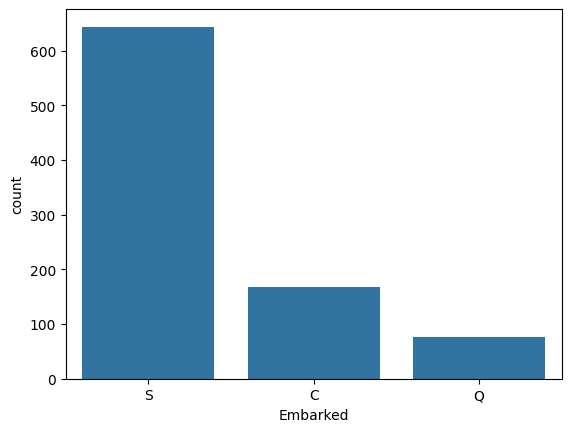

In [125]:
#print the embarked distribution 

sns.countplot(x='Embarked',data=titanic)
plt.show()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
 voici le format du dataframe avant  (891, 12)
 voici le format du dataframe apres  (891, 11)


/var/folders/s_/531btfb97_q2k843yjsr9qm80000gn/T/ipykernel_83623/1106672606.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic2['Age'].fillna(titanic['Age'].median(), inplace=True)
/var/folders/s_/531btfb97_q2k843yjsr9qm80000gn/T/ipykernel_83623/1106672606.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are sett

<Axes: >

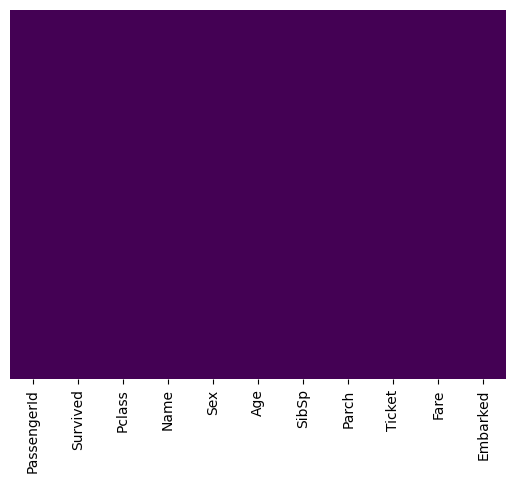

In [126]:
# We will make the following changes to the data:

# If "Age" is missing for a given row, we assign 28 (median age).
# If "Embarked" is missing for a given line, we assign "S" (most common embarked).
# We will ignore "Cabin" as a variable. There are too many missing values ​​it wouldn't make sense to assign values ​​to it.
#apply the preprocessing like above
#verify your results



print (titanic.columns)
print( " voici le format du dataframe avant ", titanic.shape)
titanic2 = titanic.drop("Cabin", axis=1, errors='ignore')
titanic2['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic2['Embarked'].fillna('S', inplace=True)
print( " voici le format du dataframe apres ",titanic2.shape)


# verify the results with another heatmap

sns.heatmap(titanic2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

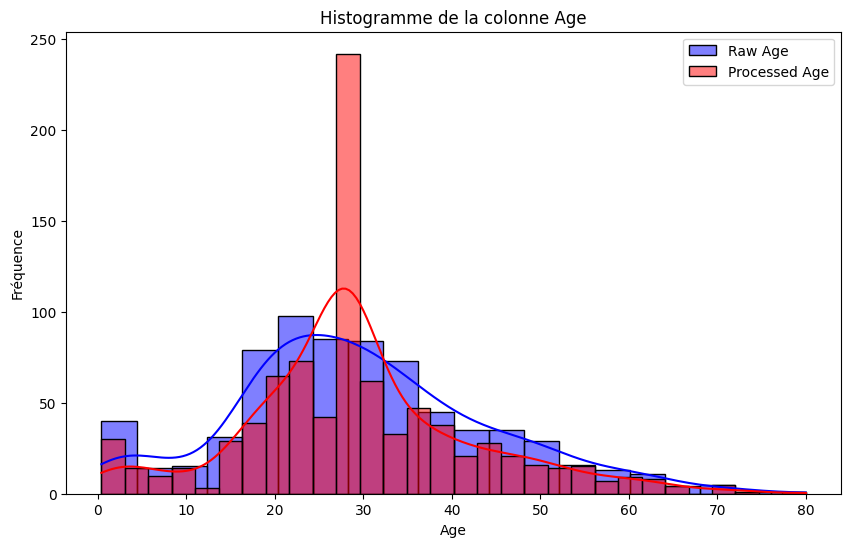

In [127]:
#print the histogram of the age column after and before processing 
# graphique avec 2 histogrammes dans la même figure
plt.figure(figsize=(10, 6))
sns.histplot(data= titanic, x='Age', kde=True, color='blue', label='Raw Age')
sns.histplot(data= titanic2, x='Age', kde=True, color='red', label='Processed Age')
plt.title('Histogramme de la colonne Age')
plt.xlabel('Age')
plt.ylabel('Fréquence')
plt.legend()
# Sauvegarde du graphique (optionnel)
plt.savefig('age_histogram.png')
plt.show()

In [128]:
#create the feature 'TravelAlone'

titanic2['TravelAlone'] = (titanic2["SibSp"] + titanic2["Parch"] == 0).astype(int)
# enlever les colonnes SibSp et Parch
titanic2.drop(['SibSp', 'Parch'], axis=1, inplace=True)

print(titanic2)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  \
0                              Braund, Mr. Owen Harris    male  22.0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
2                               Heikkinen, Miss. Laina  female  26.0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
4                             Allen, Mr. William Henry    male  35.0   
..                                                 ...     ...   ...   
886                              Montvi

In [129]:
#use the get_dummies function to encode every needed features 

print(titanic2.columns)
# Pclass
titanic2 = pd.get_dummies(titanic2, columns=["Pclass"], prefix="Pclass")
# Embarqued
titanic2 = pd.get_dummies(titanic2, columns=["Embarked"], prefix="Embarked")
# Sex
titanic2 = pd.get_dummies(titanic2, columns=["Sex"], prefix="Sex")


print(titanic2.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket',
       'Fare', 'Embarked', 'TravelAlone'],
      dtype='object')
Index(['PassengerId', 'Survived', 'Name', 'Age', 'Ticket', 'Fare',
       'TravelAlone', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male'],
      dtype='object')


In [130]:
#drop the columns that you don't need

# passengerId, Name, Ticket ,sex-female

titanic2.drop(['PassengerId', 'Name' , 'Ticket', 'Sex_female'], axis=1, inplace=True)

print(titanic2.columns)

Index(['Survived', 'Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_male'],
      dtype='object')


In [131]:
# test Data #print the null value of this dataset
titanic_test = pd.read_csv('test.csv')
print(titanic_test.isnull().sum())


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [132]:
#do the same thing for the test dataset

titanic_test2 = titanic_test.drop("Cabin", axis=1, errors='ignore')
titanic_test2['Age'].fillna(titanic_test['Age'].median(), inplace=True)
titanic_test2['Fare'].fillna(titanic_test['Fare'].median(), inplace=True)
titanic_test2['Embarked'].fillna('S', inplace=True)
titanic_test2['TravelAlone'] = (titanic_test2["SibSp"] + titanic_test2["Parch"] == 0).astype(int)
titanic_test2.drop(['SibSp', 'Parch'], axis=1, inplace=True)
titanic_test2 = pd.get_dummies(titanic_test2, columns=["Pclass"], prefix="Pclass")
titanic_test2 = pd.get_dummies(titanic_test2, columns=["Embarked"], prefix="Embarked")
titanic_test2 = pd.get_dummies(titanic_test2, columns=["Sex"], prefix="Sex" )
titanic_test2.drop(['PassengerId', 'Name' , 'Ticket', "Sex_female"], axis=1, inplace=True)

print(titanic_test2.isnull().sum())

Age            0
Fare           0
TravelAlone    0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Sex_male       0
dtype: int64


/var/folders/s_/531btfb97_q2k843yjsr9qm80000gn/T/ipykernel_83623/406470918.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_test2['Age'].fillna(titanic_test['Age'].median(), inplace=True)
/var/folders/s_/531btfb97_q2k843yjsr9qm80000gn/T/ipykernel_83623/406470918.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we ar